,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1500x1200 with 0 Axes>

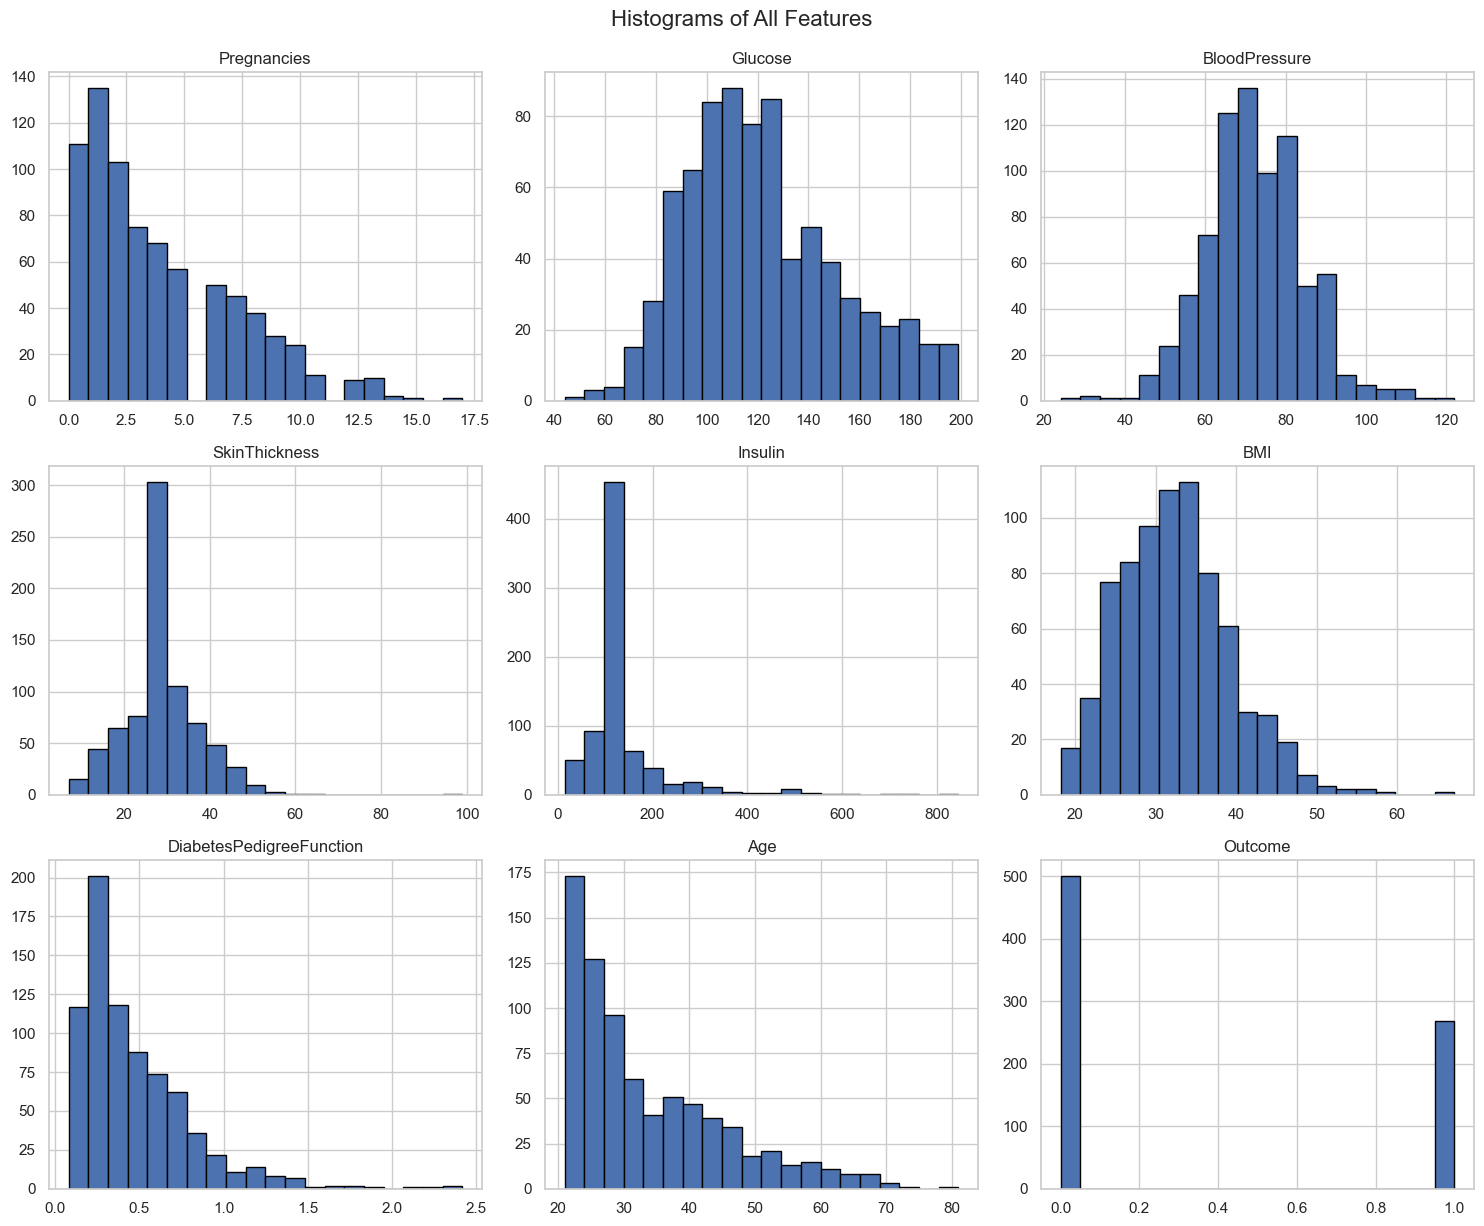

c:\Users\norma\OneDrive\桌面\Lecture\Diabetes data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression Accuracy: 0.7532
Decision Tree Accuracy: 0.7143
Random Forest Accuracy: 0.7338
XGBoost Accuracy: 0.7143

Best Model: Logistic Regression (Accuracy: 0.7532)

Suggestions to improve accuracy:
- Try hyperparameter tuning (GridSearchCV, RandomizedSearchCV)
- Engineer new features or select most important ones
- Address class imbalance if present (e.g., SMOTE, class_weight)
- Use cross-validation for robust evaluation


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Columns where 0 is considered invalid and should be treated as missing
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

# Show statistics
display(df.describe())

# Visualize histograms
plt.figure(figsize=(15, 12))
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.suptitle("Histograms of All Features", fontsize=16, y=1.02)
plt.show()

# 2. Model Training and Evaluation
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
results['Logistic Regression'] = accuracy_score(y_test, log_preds)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)
results['Decision Tree'] = accuracy_score(y_test, dt_preds)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
results['Random Forest'] = accuracy_score(y_test, rf_preds)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
results['XGBoost'] = accuracy_score(y_test, xgb_preds)

# 3. Show Results and Suggest Improvements
for model, acc in results.items():
    print(f"{model} Accuracy: {acc:.4f}")

best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} (Accuracy: {results[best_model]:.4f})")

print("\nSuggestions to improve accuracy:")
print("- Try hyperparameter tuning (GridSearchCV, RandomizedSearchCV)")
print("- Engineer new features or select most important ones")
print("- Address class imbalance if present (e.g., SMOTE, class_weight)")
print("- Use cross-validation for robust evaluation")

# Diabetes Prediction: Workflow Overview

This notebook follows these steps:
1. **Data Cleaning:** Handle missing and invalid values.
2. **Statistics & Visualization:** Show summary statistics and histograms for all features.
3. **Model Training & Evaluation:** Test Logistic Regression, Decision Tree, Random Forest, and XGBoost.
4. **Model Comparison:** Display accuracy for each model and identify the best one.
5. **Improvement Suggestions:** Provide ideas to further improve model performance.

# Trying XGBoost for Improved Accuracy
XGBoost is a powerful gradient boosting algorithm that often outperforms traditional models on tabular data. Let's train and evaluate an XGBoost classifier on the diabetes dataset.

In [5]:
# Train and evaluate XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost model (using same train-test split and scaling as before)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

c:\Users\norma\OneDrive\桌面\Lecture\Diabetes data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Confusion Matrix:
[[73 26]
 [18 37]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

XGBoost Accuracy: 0.7143
